In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import math
pd.options.display.max_colwidth = 100
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [2]:
data_dir = '../../Data/noah/'
data = pd.read_csv(data_dir + 'merged_data_31Dec18.csv')#, parse_dates=parse_dates, infer_datetime_format = False)
data.head()

/Users/ruth/miniconda3/envs/vetAI/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (26,49,69) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ALP IU/L,ALT IU/L,ARC x 1012/L,AST IU/L,Age,Age in wmd,Alb g/L,Amylase IU/L,An. gap mmol/L,BCS,BOHB mmol/L,BUN mmol/L,Band %,Band Neu x 109/L,Baso %,Basophil x 109/L,Bicarb mmol/L,Breed,CK IU/L,Ca mmol/L,Chol mmol/L,Cl mmol/L,Client code,Colour,Creat umol/L,DS,Date,Date of Birth,Deceased?,Desexed?,Eosin %,Eosin. x 109/L,First name,Full name,GammaGT IU/L,Glob g/L,Glucose mmol/L,HR,Hct L/L,Hgb g/L,ID,K mmol/L,Lipase IU/L,Lymph x 109/L,Lymph %,MCH pg,MCHC g/L,MCV fl,Metamyel %,Microchip #,Mono %,Monocyte x 109/L,Myelocyt %,Na mmol/L,Na:K,Neutr %,Others %,Pathology,Patient Code,Patient code,Phos mmol/L,Platelet x 109/L,RCC x 1012/L,RR,Sam. app,Seg Neut x 109/L,Sex,Surname first,T solids g/L,Tbili umol/L,Tot CO2 mmol/L,Tot Prot g/L,Total T4,Ur Pr:Cr,Ur prot g/L,Ur. crea umol/L,Urea mmol/L,Vaccine,WC Count x 109/L,Weight,age_sex,breed,filename,retic %,sdma,temp
0,0,NaN,NaN,NaN,NaN,4367.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSH,NaN,NaN,NaN,NaN,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,NaN,NaN,2013-11-04,2006-10-01 00:00:00,Current,Yes,NaN,NaN,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b75fb01ad62b946e261505e86c29d9f99431048b42fafdfc329379bb1da1d,NaN,NaN,NaN,NaN,NaN,NaN,5338b4389aa7e44ce7b117bd093bcf39770bbab59dc48340ab396f30bed55ce8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50407c4f1e19a6fb29e1ad1aa9e3b90e8c1852fc61a36b3f3c26060523aa247f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gribbles,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,NaN,NaN,NaN,NaN,NaN,NaN,Male,2c9971c468e02f5da67ab85ccf097a5bfe0d5c4d23186d91e89080c4c7a9d0e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,4367.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSH,NaN,NaN,NaN,NaN,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,NaN,NaN,2013-11-07,2006-10-01 00:00:00,Current,Yes,NaN,NaN,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b75fb01ad62b946e261505e86c29d9f99431048b42fafdfc329379bb1da1d,NaN,NaN,NaN,NaN,NaN,NaN,adec8431a13a12a60ebf9824076ec9c2ab0c250efa962667cf7e3bbb38733361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50407c4f1e19a6fb29e1ad1aa9e3b90e8c1852fc61a36b3f3c26060523aa247f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,NaN,NaN,NaN,NaN,NaN,NaN,Male,2c9971c468e02f5da67ab85ccf097a5bfe0d5c4d23186d91e89080c4c7a9d0e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,23.0,33.0,0.02 ,18.0,4367.0,1111.0,28.0,NaN,14.9,NaN,NaN,7.9,0.0,0,0.2,0.01,NaN,DSH,96.0,2.64,5.5,117.0,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,95.0,NaN,2014-09-30,2006-10-01 00:00:00,Current,Yes,2.9,0.18 ,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b75fb01ad62b946e261505e86c29d9f99431048b42fafdfc329379bb1da1d,5.0,39.0,5.8,NaN,0.35 ,115 ,17c736445da9991349ed165fb055c80f6ecc9da46893fbbc0c63c294af8b33ff,4.4,NaN,2.1 ,34.5,14.1 ,330 ,42.9 ,NaN,50407c4f1e19a6fb29e1ad1aa9e3b90e8c1852fc61a36b3f3c26060523aa247f,1.6,0.10 ,NaN,149.0,NaN,60.7,NaN,ASAP,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,1.51,NaN,8.12 ,NaN,NaN,3.7 ,Male,2c9971c468e02f5da67ab85ccf097a5bfe0d5c4d23186d91e89080c4c7a9d0e1,NaN,3.0,21.5,67.0,22.0,NaN,NaN,NaN,NaN,Vaccine,6.15 ,NaN,8 Years Castrated Male,Domestic Short Hair,ce62da33ee5ce62c26cacff0ee7d9790d0f2b1ef23ccb6dc19c65874d77d1a75,0.28 ,NaN,NaN
3,4,NaN,NaN,NaN,NaN,4367.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSH,NaN,NaN,NaN,NaN,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,NaN,NaN,2015-03-24,2006-10-01 00:00:00,Current,Yes,NaN,NaN,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b

# Number of visits

In [10]:
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

In [3]:
# make histogram entries for number of visits of total data set
hist = []
for patient in data['Patient Code'].unique():
    patientData = data[data['Patient Code'] == patient]
    numVisits = len(patientData['Date'].unique())
    hist.append(numVisits)

In [6]:
# make columns indication presence/absence of haem or bio results
data['haem?'] = False
data.loc[data['Band Neu x 109/L'].notna(),'haem?'] = True
data['bio?'] = False
data.loc[data['Creat    umol/L'].notna(),'bio?'] = True


In [7]:
# Make data frames containing heam, bio, both or no bloods
data_haem = data[data['haem?']]
data_bio = data[data['bio?']]
data_both = data[ (data['haem?']) & (data['bio?'])]
# get records with no bloods at all
data_nobloods = data[ (data['haem?']==False) & (data['bio?']==False)]

In [28]:
print('total records: ', sum(hist))
print('nobloods records: ', sum(hist_nobloods))
print('haem records: ', sum(hist_haem))
print('bio records: ', sum(hist_bio))
print('both records: ', sum(hist_both))
print('(There are 17 bio records without haem, and 19 haem records without bio)')

total records:  17738
nobloods records:  16605
haem records:  1116
bio records:  1114
both records:  1097
(There are 17 bio records without haem, and 19 haem records without bio)


In [8]:
# create histogram entries for haem, bio, nobloods and haem&bio dfs
hist_nobloods = []
hist_haem = []
hist_bio = []
hist_both = []
for patient in data_haem['Patient Code'].unique():
    hist_haem.append(len(data_haem[data_haem['Patient Code'] == patient]['Date'].unique()))
for patient in data_bio['Patient Code'].unique():
    hist_bio.append(len(data_bio[data_bio['Patient Code'] == patient]['Date'].unique()))    
for patient in data_nobloods['Patient Code'].unique():
    hist_nobloods.append(len(data_nobloods[data_nobloods['Patient Code'] == patient]['Date'].unique()))        
for patient in data_both['Patient Code'].unique():
    hist_both.append(len(data_both[data_both['Patient Code'] == patient]['Date'].unique()))            

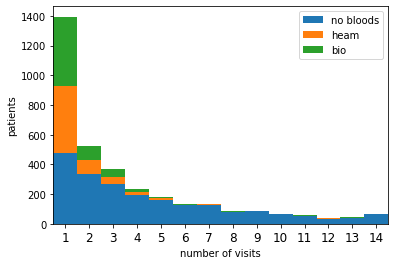

In [27]:
bins = range(1,16,1)
plt.hist([hist_nobloods, hist_haem, hist_bio], bins=bins, stacked = True)
bins_labels(bins, fontsize=12)
plt.ylabel('patients')
plt.xlabel('number of visits')
plt.legend(['no bloods', 'heam', 'bio'])
plt.show()

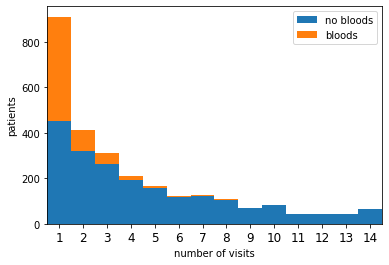

In [25]:
bins = range(1,16,1)
plt.hist([hist, hist_both], bins=bins, stacked = True)
bins_labels(bins, fontsize=12)
plt.ylabel('patients')
plt.xlabel('number of visits')
plt.legend(['no bloods', 'bloods'])
plt.show()

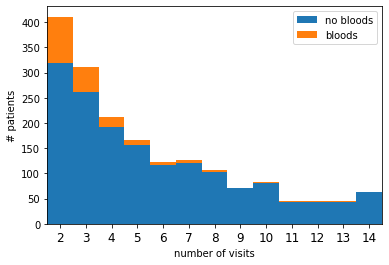

In [29]:
bins = range(2,16,1)
plt.hist([hist, hist_both], bins=bins, stacked = True)
bins_labels(bins, fontsize=12)
plt.ylabel('# patients')
plt.xlabel('number of visits')
plt.legend(['no bloods', 'bloods'])
plt.show()

# Visit stats for cats with CKD

In [31]:
# Read merged data
data_dir = '../../Data/noah/'
data = pd.read_csv(data_dir + 'merged_data_31Dec18.csv')#, parse_dates=parse_dates, infer_datetime_format = False)
data.head()

,Unnamed: 0,ALP IU/L,ALT IU/L,ARC x 1012/L,AST IU/L,Age,Age in wmd,Alb g/L,Amylase IU/L,An. gap mmol/L,BCS,BOHB mmol/L,BUN mmol/L,Band %,Band Neu x 109/L,Baso %,Basophil x 109/L,Bicarb mmol/L,Breed,CK IU/L,Ca mmol/L,Chol mmol/L,Cl mmol/L,Client code,Colour,Creat umol/L,DS,Date,Date of Birth,Deceased?,Desexed?,Eosin %,Eosin. x 109/L,First name,Full name,GammaGT IU/L,Glob g/L,Glucose mmol/L,HR,Hct L/L,Hgb g/L,ID,K mmol/L,Lipase IU/L,Lymph x 109/L,Lymph %,MCH pg,MCHC g/L,MCV fl,Metamyel %,Microchip #,Mono %,Monocyte x 109/L,Myelocyt %,Na mmol/L,Na:K,Neutr %,Others %,Pathology,Patient Code,Patient code,Phos mmol/L,Platelet x 109/L,RCC x 1012/L,RR,Sam. app,Seg Neut x 109/L,Sex,Surname first,T solids g/L,Tbili umol/L,Tot CO2 mmol/L,Tot Prot g/L,Total T4,Ur Pr:Cr,Ur prot g/L,Ur. crea umol/L,Urea mmol/L,Vaccine,WC Count x 109/L,Weight,age_sex,breed,filename,retic %,sdma,temp
0,0,NaN,NaN,NaN,NaN,4367.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSH,NaN,NaN,NaN,NaN,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,NaN,NaN,2013-11-04,2006-10-01 00:00:00,Current,Yes,NaN,NaN,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b75fb01ad62b946e261505e86c29d9f99431048b42fafdfc329379bb1da1d,NaN,NaN,NaN,NaN,NaN,NaN,5338b4389aa7e44ce7b117bd093bcf39770bbab59dc48340ab396f30bed55ce8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50407c4f1e19a6fb29e1ad1aa9e3b90e8c1852fc61a36b3f3c26060523aa247f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gribbles,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,NaN,NaN,NaN,NaN,NaN,NaN,Male,2c9971c468e02f5da67ab85ccf097a5bfe0d5c4d23186d91e89080c4c7a9d0e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,4367.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSH,NaN,NaN,NaN,NaN,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,NaN,NaN,2013-11-07,2006-10-01 00:00:00,Current,Yes,NaN,NaN,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b75fb01ad62b946e261505e86c29d9f99431048b42fafdfc329379bb1da1d,NaN,NaN,NaN,NaN,NaN,NaN,adec8431a13a12a60ebf9824076ec9c2ab0c250efa962667cf7e3bbb38733361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50407c4f1e19a6fb29e1ad1aa9e3b90e8c1852fc61a36b3f3c26060523aa247f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,NaN,NaN,NaN,NaN,NaN,NaN,Male,2c9971c468e02f5da67ab85ccf097a5bfe0d5c4d23186d91e89080c4c7a9d0e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vaccine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,23.0,33.0,0.02 ,18.0,4367.0,1111.0,28.0,NaN,14.9,NaN,NaN,7.9,0.0,0,0.2,0.01,NaN,DSH,96.0,2.64,5.5,117.0,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,95.0,NaN,2014-09-30,2006-10-01 00:00:00,Current,Yes,2.9,0.18 ,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b75fb01ad62b946e261505e86c29d9f99431048b42fafdfc329379bb1da1d,5.0,39.0,5.8,NaN,0.35 ,115 ,17c736445da9991349ed165fb055c80f6ecc9da46893fbbc0c63c294af8b33ff,4.4,NaN,2.1 ,34.5,14.1 ,330 ,42.9 ,NaN,50407c4f1e19a6fb29e1ad1aa9e3b90e8c1852fc61a36b3f3c26060523aa247f,1.6,0.10 ,NaN,149.0,NaN,60.7,NaN,ASAP,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,edd17b9a8b12d531af032d47be8423d5e836f2efffe4edc4abf5a4278d7dec3d,1.51,NaN,8.12 ,NaN,NaN,3.7 ,Male,2c9971c468e02f5da67ab85ccf097a5bfe0d5c4d23186d91e89080c4c7a9d0e1,NaN,3.0,21.5,67.0,22.0,NaN,NaN,NaN,NaN,Vaccine,6.15 ,NaN,8 Years Castrated Male,Domestic Short Hair,ce62da33ee5ce62c26cacff0ee7d9790d0f2b1ef23ccb6dc19c65874d77d1a75,0.28 ,NaN,NaN
3,4,NaN,NaN,NaN,NaN,4367.0,1111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DSH,NaN,NaN,NaN,NaN,ecf0e1a733211792c3bb2b8548645505b137f84efb2b1333378d206d1d3158f7,Black and White,NaN,NaN,2015-03-24,2006-10-01 00:00:00,Current,Yes,NaN,NaN,7243c69c49ea92584913fb54aba55e3b4663b0b65bba02f772208e1192dd7b96,573b

In [32]:
# create CKS column
data['CKD?'] = 'Unknown'
data.at[(data['BUN      mmol/L'] > 10.7) & (data['Creat    umol/L'] > 160), 'CKD?'] = 'CKD'
data.at[(data['BUN      mmol/L'] < 10.7) & (data['Creat    umol/L'] < 160), 'CKD?'] = 'no CKD'

In [45]:
# get df of only CKD cats
CKD_cats = data[data['CKD?'] == 'CKD']
CKD_patients = list(CKD_cats['Patient Code'].unique())

In [48]:
print('Number of CKD patients: ', len(CKD_patients))

Number of CKD patients:  33


In [55]:
# take both bloods entries for only CKD cats
bloods_CKD_cats = data_both[data_both['Patient Code'].isin(CKD_patients)]
len(bloods_CKD_cats['Patient Code'].unique())

33

In [56]:
# create hist entries
hist_CKD = []
for patient in bloods_CKD_cats['Patient Code'].unique():
    hist_CKD.append(len(bloods_CKD_cats[bloods_CKD_cats['Patient Code'] == patient]['Date'].unique()))

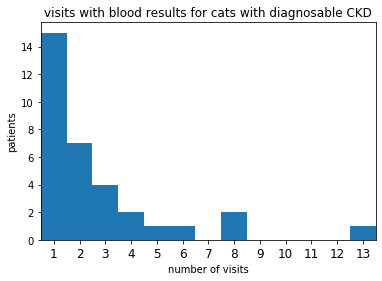

In [62]:
bins = range(1,15,1)
plt.hist(hist_CKD, bins=bins, stacked = True)
bins_labels(bins, fontsize=12)
plt.ylabel('patients')
plt.xlabel('number of visits')
#plt.legend(['no bloods', 'bloods'])
plt.title('visits with blood results for cats with diagnosable CKD')
plt.show()

In [49]:
#time between visits
